In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

# Поиск активности на первых ста результатах

In [298]:
df = pd.read_csv("df_train")
df = df.drop(['Unnamed: 0'], axis = 1)

In [299]:
from chembl_webresource_client.new_client import new_client

In [300]:
ID_H = []
MWT_H = []
index = []
def ID_MWT_H(x, y, z, ID_H = ID_H, MWT_H = MWT_H, index = index):
    try:
        substructure = new_client.substructure
        res = substructure.filter(
        smiles=x).filter(
        molecule_properties__mw_freebase__lte=y).filter(standard_type="Ki").only(
        ['molecule_chembl_id','molecule_properties'])
        for i in range(len(res)):
            delta= y - float(res[i].get('molecule_properties').get('full_mwt'))
            if ((delta +1) // 18 == float(z) and (delta - 1) // 18 + 1 == float(z)):
        
                index.append(x)
                ID_H.append(res[i].get('molecule_chembl_id'))
                MWT_H.append(res[i].get('molecule_properties').get('full_mwt'))
                print('yeah')
                
                
                return res[i].get('molecule_chembl_id')
                break
    except:
        print('Not found')

In [301]:
df.apply(lambda x: ID_MWT_H(x.Smiles_H, x.MWT_F, x.count_F), axis = 1)

Жопа


From cffi callback <function _verify_callback at 0x00000169E66E7378>:
Traceback (most recent call last):
  File "C:\Users\grish\Anaconda3\lib\site-packages\OpenSSL\SSL.py", line 306, in wrapper
    @wraps(callback)
KeyboardInterrupt


Жопа
yeah
yeah
Жопа
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah
yeah


0              None
1              None
2              None
3              None
4              None
5              None
6              None
7              None
8     CHEMBL3459615
9              None
10             None
11     CHEMBL289959
12             None
13             None
14    CHEMBL1540409
15             None
16    CHEMBL3403025
17             None
18    CHEMBL1188853
19             None
20             None
21             None
22             None
23             None
24             None
25             None
26    CHEMBL3403090
27             None
28             None
29             None
          ...      
70             None
71    CHEMBL3403397
72    CHEMBL1196165
73    CHEMBL3403410
74             None
75             None
76             None
77             None
78             None
79             None
80             None
81    CHEMBL1186832
82             None
83             None
84             None
85             None
86             None
87    CHEMBL1194368
88             None


In [302]:
dd = {'ID_H' : ID_H, 'MWT_H' : MWT_H, 'Smiles_H' : index}
df_append = pd.DataFrame(dd)
df_H_F = pd.merge(df, df_append, how = 'inner', on = 'Smiles_H')
df_H_F['delta']= (pd.Float64Index(df_H_F['MWT_F']) - pd.Float64Index(df_H_F['MWT_H'])) / 18
df_H_F

,ID_F,Bioactivities,MWT_F,Brutto_F,Smiles,Smiles_H,count_F,ID_H,MWT_H,delta
0,CHEMBL3459648,7.0,305.1540,C16H20FN3O2,COc1c(CNC2CCOc3c(F)cccc32)c(C)nn1C,COc1c(CNC2CCOc3ccccc32)c(C)nn1C,1,CHEMBL3459615,287.36,0.988556
1,CHEMBL92985,7.0,239.0859,C14H10FN3,Fc1cccc(Nc2ncnc3ccccc23)c1,c1cccc(Nc2ncnc3ccccc23)c1,1,CHEMBL289959,221.26,0.990328
2,CHEMBL1584426,12.0,369.1522,C17H24FN3O3S,CN1CCN(C(=O)C2CCCN(S(=O)(=O)c3ccc(F)cc3)C2)CC1,CN1CCN(C(=O)C2CCCN(S(=O)(=O)c3ccccc3)C2)CC1,1,CHEMBL1540409,351.47,0.982344
3,CHEMBL3403030,5.0,487.0926,C22H16F3N5O3S,CN(c1ccc2[nH]c(-c3n[nH]c4ccccc34)cc2n1)S(=O)(=...,CN(c1ccc2[nH]c(-c3n[nH]c4ccccc34)cc2n1)S(=O)(=...,3,CHEMBL3403025,433.49,2.977922
4,CHEMBL1196390,NaN,427.1842,C22H26FN5OS,Nc1c(F)cccc1C(=O)NCCCCN1CCN(c2nsc3ccccc23)CC1,Nc1ccccc1C(=O)NCCCCN1CCN(c2nsc3ccccc23)CC1,1,CHEMBL1188853,409.56,0.979122
5,CHEMBL3403099,4.0,427.9856,C20H10ClFN2O2S2,N#Cc1cc(F)cc(S(=O)(=O)c2sc3ncccc3c2-c2cccc(Cl)...,N#Cc1cccc(S(=O)(=O)c2sc3ncccc3c2-c2cccc(Cl)c2)c1,1,CHEMBL3403090,410.91,0.948644
6,CHEMBL1213617,8.0,245.0664,C11H10F3NO2,O=C(N1CCc2cc(O)ccc2C1)C(F)(F)F,O=C(N1CCc2cc(O)ccc2C1)C,3,CHEMBL1766971,191.23,2.990911
7,CHEMBL94641,2.0,324.1274,C19H17FN2O2,CCC(=O)c1cnc2c(O)cccc2c1Nc1ccc(F)cc1C,CCC(=O)c1cnc2c(O)cccc2c1Nc1ccccc1C,1,CHEMBL327491,306.37,0.986522
8,CHEMBL3403255,5.0,396.1762,C22H22F2N4O,Cc1cc(N2CCC(NC(=O)Nc3ccc(F)cc3)CC2)c2cc(F)ccc2n1,Cc1cc(N2CCC(NC(=O)Nc3ccccc3)CC2)c2ccccc2n1,2,CHEMBL3403242,360.46,1.984233
9,CHEMBL3403279,4.0,412.1533,C22H22F2N4S,Cc1cc(N2CCC(NC(=S)Nc3ccc(F)cc3)CC2)c2cc(F)ccc2n1,Cc1cc(N2CCC(NC(=S)Nc3ccccc3)CC2)c2ccccc2n1,2,CHEMBL3403266,376.53,1.979072


In [304]:
act = pd.DataFrame()
def activity_F(x, act = act, activity = new_client.activity) -> pd.DataFrame:
    res = activity.filter(molecule_chembl_id=x).only(['assay_chembl_id', 'type',
                                                                'value'])
    if len(res) == 0:
        print('passive')
        return None
    else:
        res = pd.DataFrame(res)
        res['ID_F'] = x 
        act = pd.concat([act, res])
        print('active')
        return pd.DataFrame(act)

In [305]:
F = df_H_F['ID_F'].apply(lambda x: activity_F(x))


  assay_chembl_id        type         value           ID_F
0   CHEMBL3507681  Inhibition  -3.454084938  CHEMBL3459648
1   CHEMBL3988443  Inhibition   16.85393258  CHEMBL3459648
2   CHEMBL4513217  INHIBITION          3.63  CHEMBL3459648
3   CHEMBL4513218  INHIBITION          20.0  CHEMBL3459648
4   CHEMBL4513219  INHIBITION           7.5  CHEMBL3459648
5   CHEMBL4513220  INHIBITION        -153.0  CHEMBL3459648
6   CHEMBL4513221  INHIBITION          1.24  CHEMBL3459648
  assay_chembl_id   type   value         ID_F
0    CHEMBL680017   IC50    56.0  CHEMBL92985
1    CHEMBL952131  pIC50    7.25  CHEMBL92985
2   CHEMBL3813350   IC50   14.98  CHEMBL92985
3   CHEMBL3813349   IC50   13.23  CHEMBL92985
4   CHEMBL3813348   IC50    7.58  CHEMBL92985
5   CHEMBL4328822   IC50  8120.0  CHEMBL92985
6   CHEMBL4328835   Vmax   140.0  CHEMBL92985
   assay_chembl_id     type    value           ID_F
0    CHEMBL1614459  Potency  29.0929  CHEMBL1584426
1    CHEMBL1614174  Potency  44.6684  CHEMBL1584426
2   

In [306]:
activ = F[0]
for i in range(1, len(F)):
    activ = pd.concat([activ, F[i]])

df_act = pd.merge(df_H_F, activ, on = 'ID_F', how = 'left')
df_act = df_act.rename(columns={'type' : 'type_F', 'value' : 'value_F'})
df_act = df_act.drop(df_act[df_act["assay_chembl_id"].isna()].index)
df_act

In [311]:
def activity_H(x, act = act, activity = new_client.activity):
    res = activity.filter(molecule_chembl_id=x).only(['assay_chembl_id', 'type',
                                                                'value'])
    if len(res) == 0:
        print('passive')
        return None
    else:
        res = pd.DataFrame(res)
        res['ID_H'] = x
        print('active')
        return pd.DataFrame(res)

In [ ]:
H = df_H_F['ID_H'].apply(lambda x: activity_H(x))

In [312]:

activ_H = H[0]
for i in range(1, len(H)):
    activ_H = pd.concat([activ_H, H[i]])
activ_H = activ_H.rename(columns={'type' : 'type_H', 'value' : 'value_H'})
activ_H.to_csv('activ_H.csv')

active
active
active
active
passive
active
active
active
active
active
active
active
active
active
active
active
active
passive
active
passive
passive
passive
active


In [314]:
df_act = pd.merge(df_act, activ_H, on = 'assay_chembl_id', how = 'left')
df_act = df_act[df_act['ID_H_x'] == df_act['ID_H_y']]
df_act = df_act.drop(['ID_H_y', 'delta', 
                      #'count_F', 
                      'MWT_F', 'MWT_H',
                     'Bioactivities', 'Brutto_F'], axis = 1)

In [337]:
df_act.to_csv('activity_train.csv')

In [327]:
gra = df_act[['type_F', 'value_F', 'value_H', 'count_F']]
gra = gra.drop(gra[gra["type_F"] != 'IC50'].index)
gra['value_F'] = gra['value_F'].astype(float)
gra['value_H'] = gra['value_H'].astype(float)
x = np.arange(0, 50, 1)

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


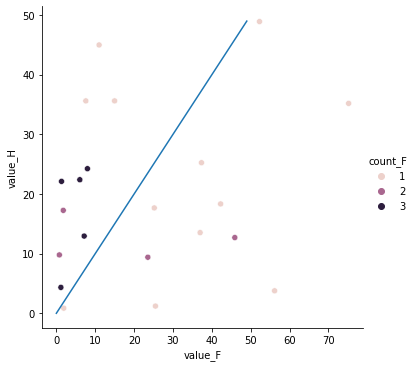

In [344]:
sns.relplot(x="value_F", y="value_H", hue='count_F', data=gra[gra['value_H'] < 50])
sns.lineplot(x = x, y = x, legend = False)